![](https://housing.com/news/wp-content/uploads/2022/11/iris-flower-compressed.jpg)
<div style="padding: 10px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://www.yates.com.au/media/plants/flowers-and-ornamentals/flowers/flowers-iris-image1.jpg?mode=crop&anchor=center&widthratio=1.5&height=576&format=jpg)"><b><span style='color:Yellow;font-size:60px; font-family:Times New Roman;'> IRIS FLOWER CLASSIFICATION </span></b> </div>



![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

<div style="padding: 0px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://housing.com/news/wp-content/uploads/2022/11/iris-flower-compressed.jpg)"><b><span style='color:Yellow;font-size:60px;'> Getting Started </span></b> </div>

 <h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Importing Libraries</h1>

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">✔️Iris ☀️Dataset💥 EDA and Prediction💯</h1>

In [43]:
df = pd.read_csv('../data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
20,21,5.4,3.4,1.7,0.2,Iris-setosa
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
17,18,5.1,3.5,1.4,0.3,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [47]:
df['species']=df['species'].str.replace('Iris-','')

In [48]:
df.describe()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


![](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Sepal Length & Width</h1>

Text(0, 0.5, 'Length/Width')

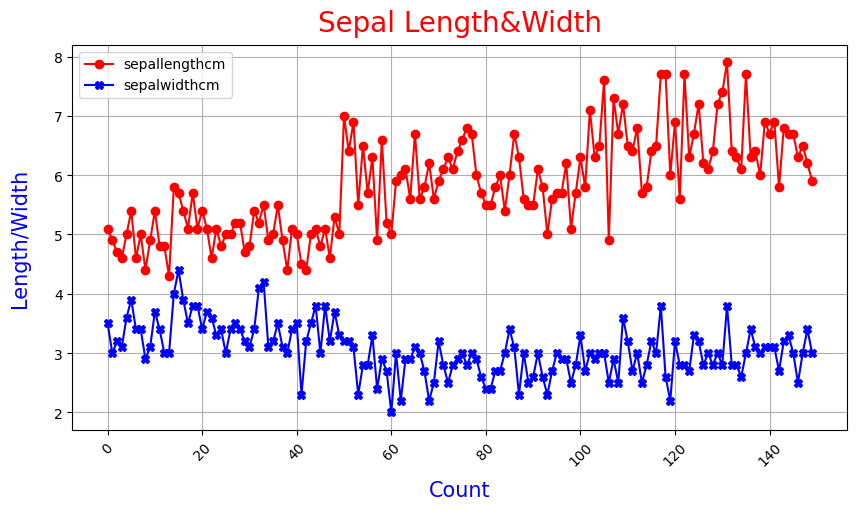

In [49]:
# df['sepal_length'].plot(kind='hist')
df['sepallengthcm'].plot(kind='line',legend=True,marker='o',color='r',figsize=(10,5),grid=True,rot=45)
df['sepalwidthcm'].plot(kind='line',legend=True,marker="X",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Sepal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

<h1 style="border:3px solid darkred; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:darkred;font-weight:bold; font-size:45px;">Sepal length is greater then Sepal width</h1>

Text(0, 0.5, 'Length/Width')

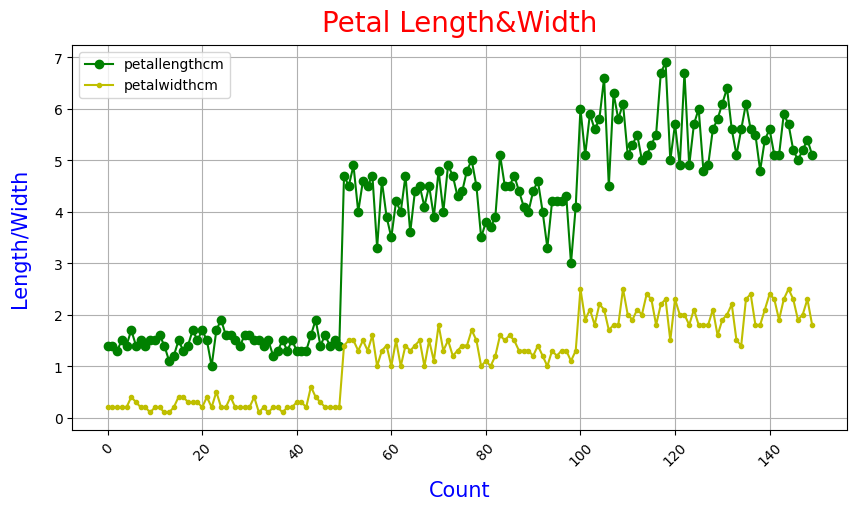

In [50]:
df['petallengthcm'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
df['petalwidthcm'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
plt.title('Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

<h1 style="border:3px solid purple; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:purple;font-weight:bold; font-size:45px;">Petal length is greater then Petal width</h1>

Text(0, 0.5, 'Length/Width')

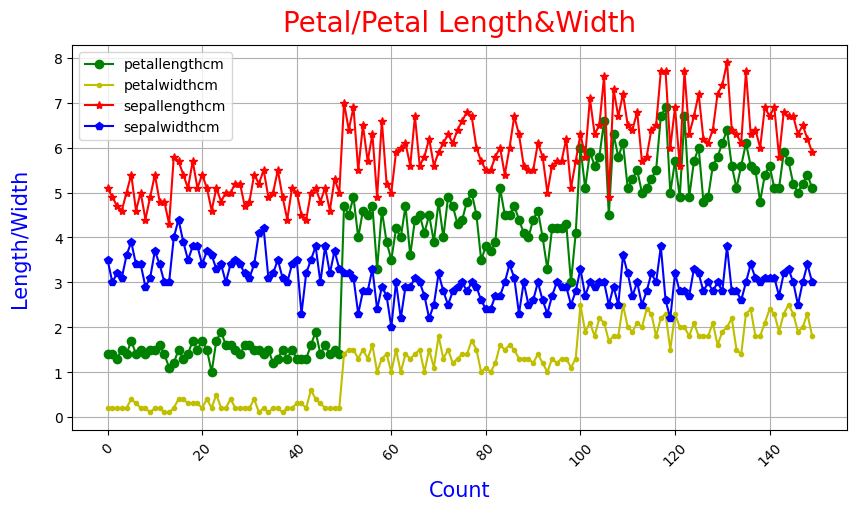

In [51]:
df['petallengthcm'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
df['petalwidthcm'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
df['sepallengthcm'].plot(kind='line',legend=True,marker="*",color='r',figsize=(10,5),grid=True,rot=45)
df['sepalwidthcm'].plot(kind='line',legend=True,marker="p",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Petal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

<h1 style="border:3px solid purple; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:purple;font-weight:bold; font-size:45px;">Data Visualization</h1>

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Figure size 1700x600 with 0 Axes>

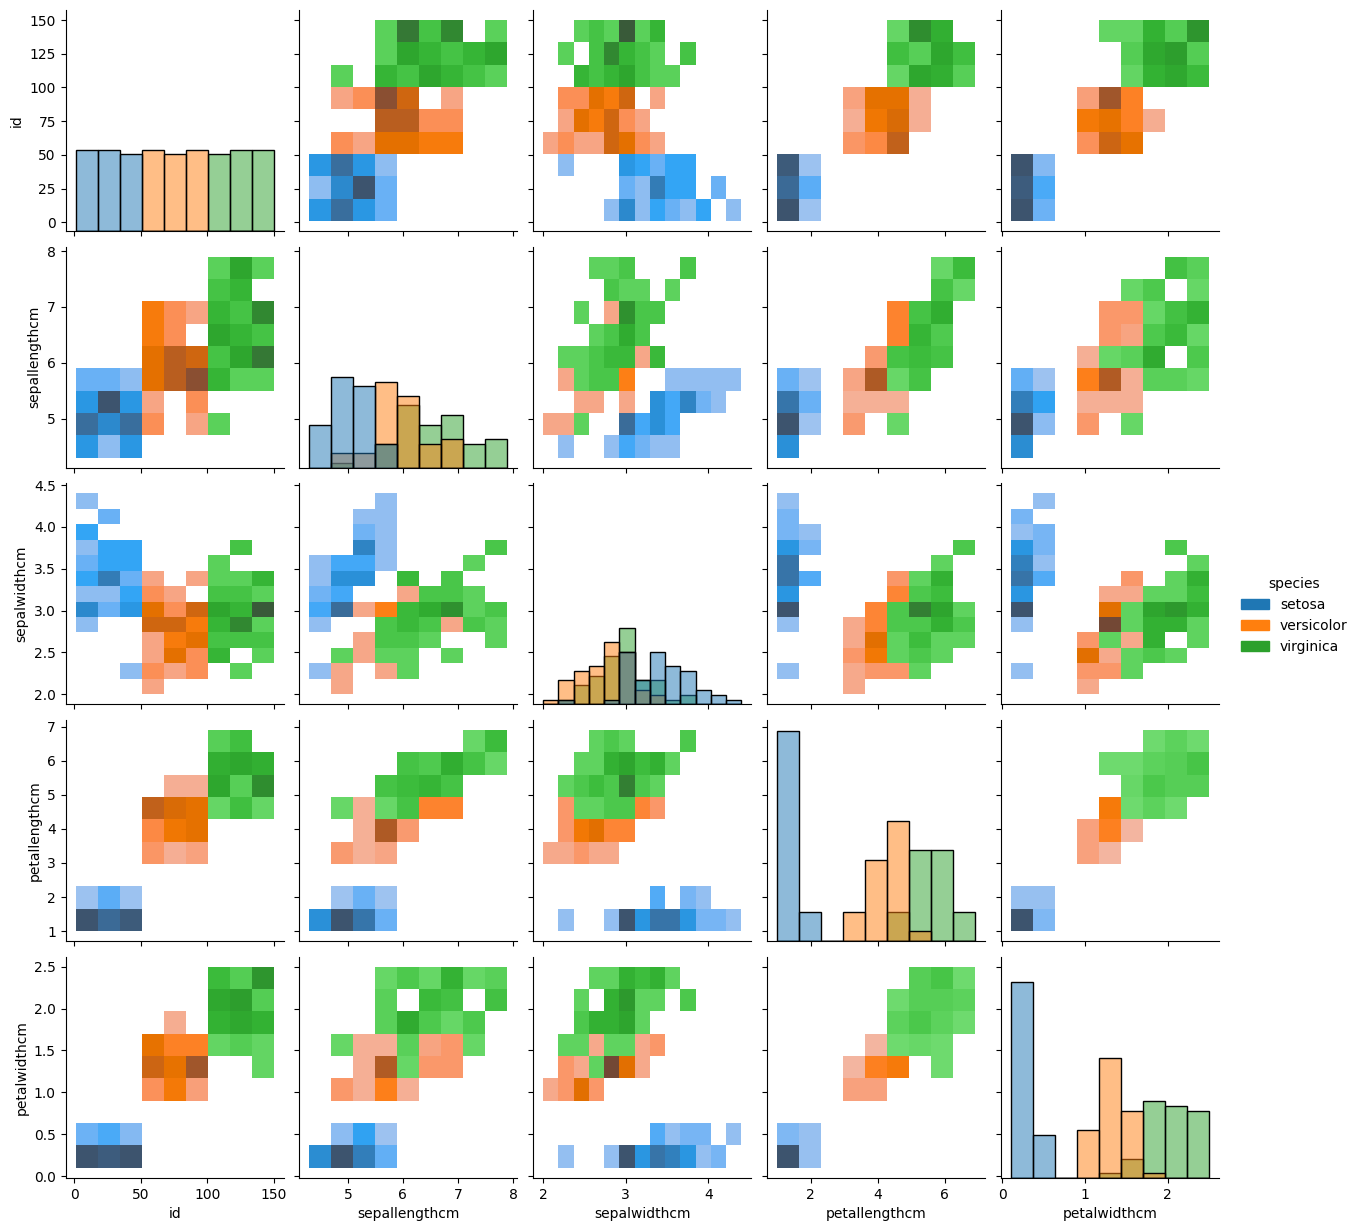

In [52]:
plt.figure(figsize=(17,6))
sns.pairplot(df,hue='species',kind='hist')

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Figure size 1700x600 with 0 Axes>

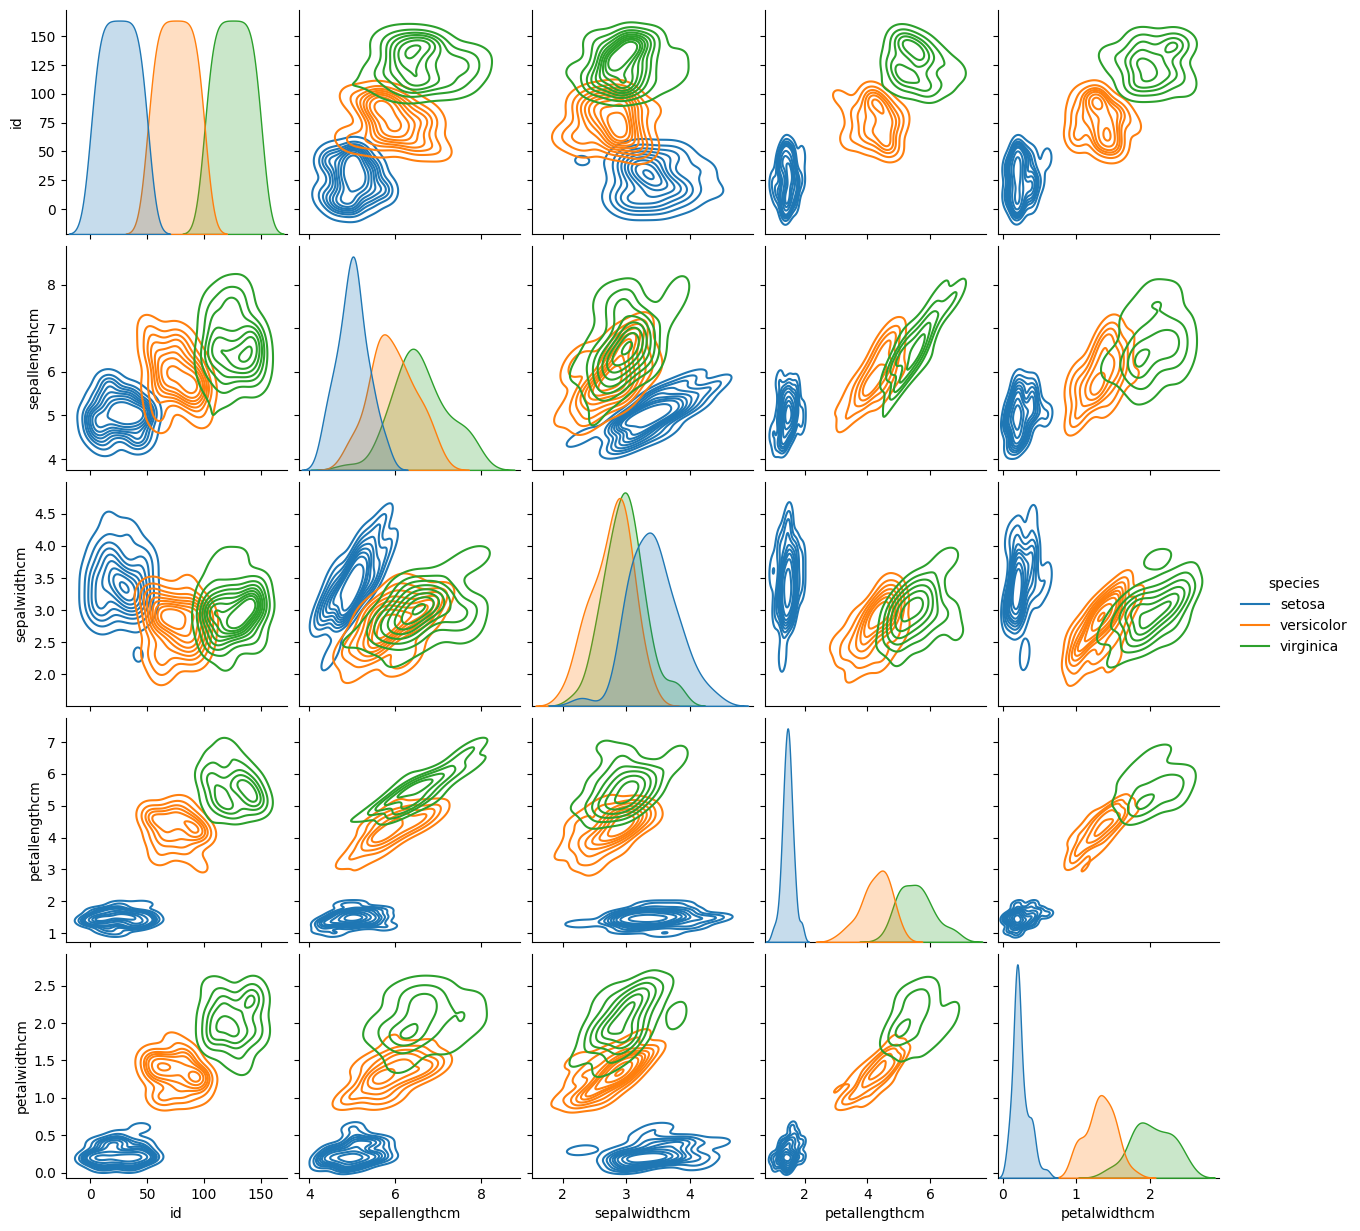

In [53]:
plt.figure(figsize=(17,6))
sns.pairplot(df,hue='species',kind='kde')

<Axes: title={'center': 'Species'}>

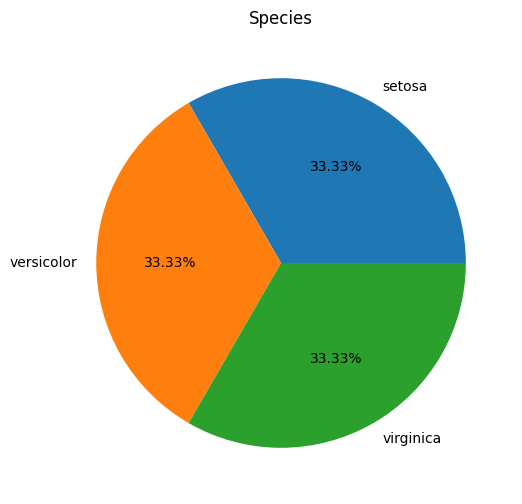

In [54]:
plt.figure(figsize=(17,6))
df['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')


/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

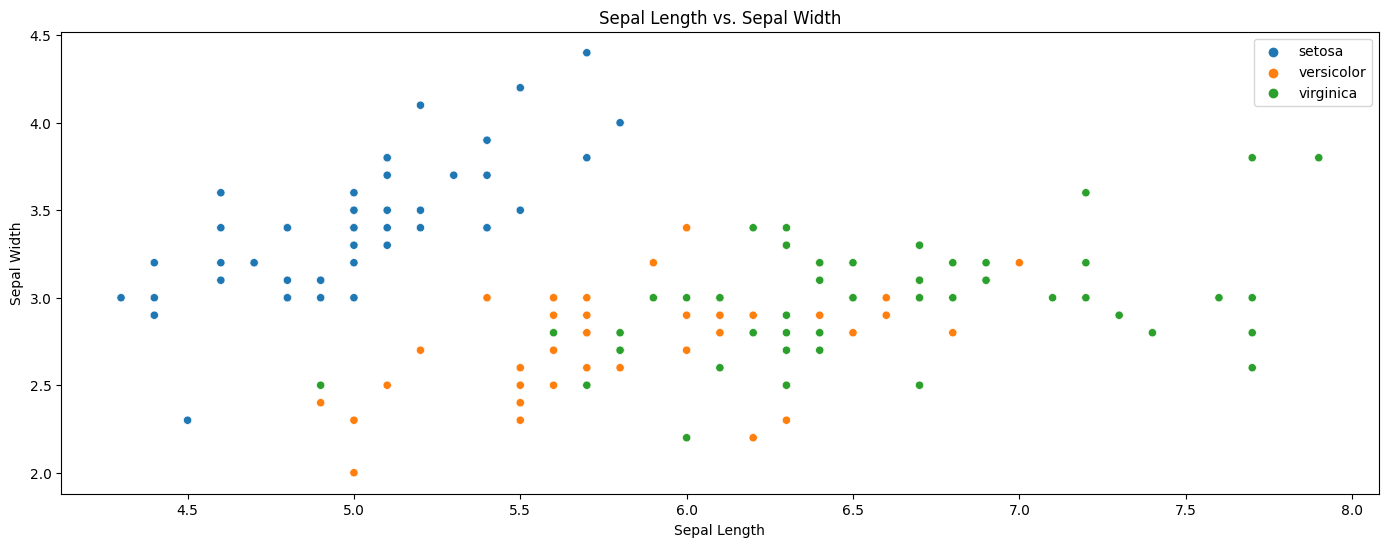

In [55]:
# # plt.figure(figsize=(17,6))
# sns.scatterplot(df['sepal_length'],df['sepal_width'],hue=df['species'])
# plt.legend(loc='upper right')
# plt.title('Sepal Length/Width')
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='sepallengthcm', y='sepalwidthcm', hue='species')
plt.legend(loc='upper right')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

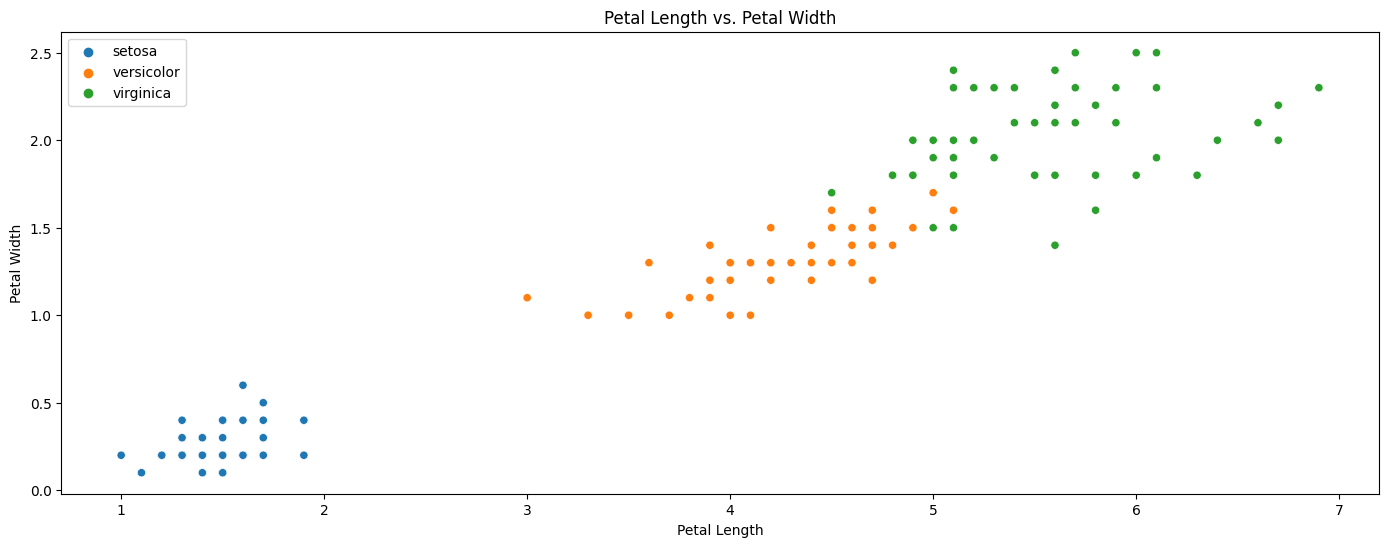

In [56]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='petallengthcm', y='petalwidthcm', hue='species')
plt.legend(loc='upper left')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

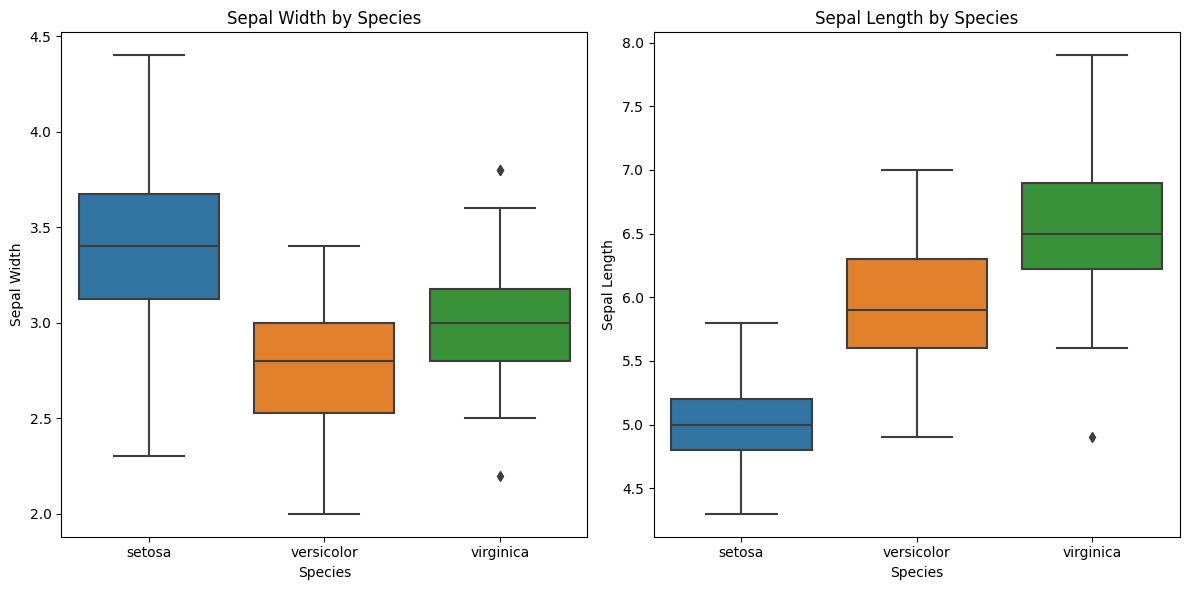

In [57]:
# Create subplots for sepal width and sepal length
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for sepal width
sns.boxplot(data=df, x='species', y='sepalwidthcm', ax=axes[0])
axes[0].set_title('Sepal Width by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Sepal Width')

# Box plot for sepal length
sns.boxplot(data=df, x='species', y='sepallengthcm', ax=axes[1])
axes[1].set_title('Sepal Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Sepal Length')

plt.tight_layout()
plt.show()

/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/penscola/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Figure size 1000x600 with 0 Axes>

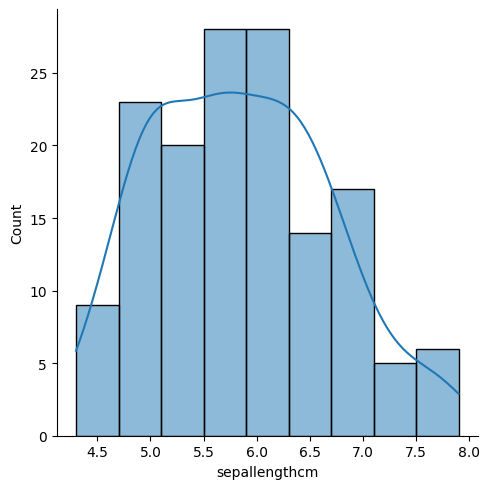

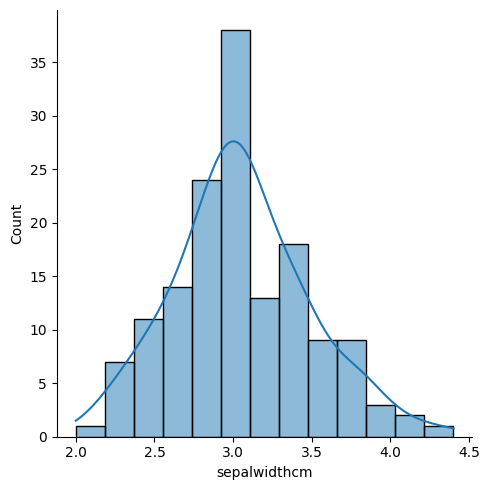

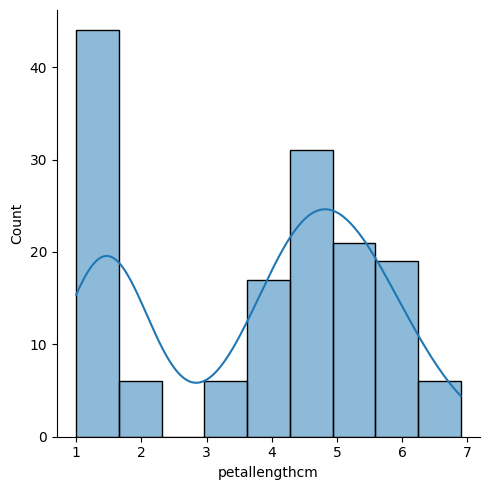

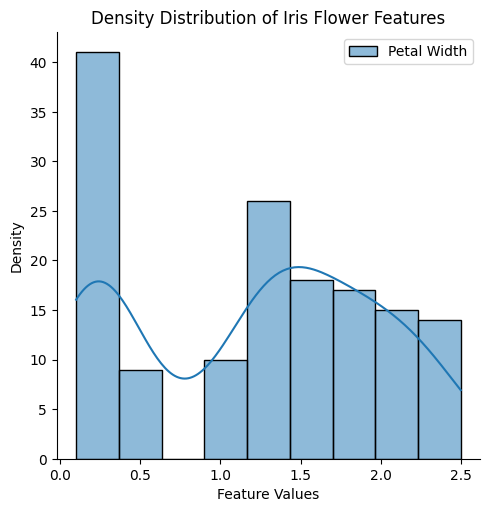

In [58]:
# # Density distribution plots for different features
# plt.figure(figsize=(10, 6))

# sns.distplot(df['sepal_length'], label='Sepal Length', hist=False)
# sns.distplot(df['sepal_width'], label='Sepal Width', hist=False)
# sns.distplot(df['petal_length'], label='Petal Length', hist=False)
# sns.distplot(df['petal_width'], label='Petal Width', hist=False)

# plt.legend()
# plt.title('Density Distribution of Iris Flower Features')
# plt.xlabel('Feature Values')
# plt.ylabel('Density')
# plt.show()
# Density distribution plots for different features
plt.figure(figsize=(10, 6))

sns.displot(data=df, x='sepallengthcm', label='Sepal Length', kde=True)
sns.displot(data=df, x='sepalwidthcm', label='Sepal Width', kde=True)
sns.displot(data=df, x='petallengthcm', label='Petal Length', kde=True)
sns.displot(data=df, x='petalwidthcm', label='Petal Width', kde=True)

plt.legend()
plt.title('Density Distribution of Iris Flower Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.show()

In [59]:
le = LabelEncoder()

In [60]:
df['species']=le.fit_transform(df['species'])
df

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


<h1 style="border:3px solid purple; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:purple;font-weight:bold; font-size:45px;">Model  Train & Test</h1>

In [61]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:4],df['species'],test_size=0.2,random_state=2)

In [62]:
lor = LogisticRegression()

In [63]:
lor.fit(X_train,y_train)

/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
test = lor.predict(X_test)
for tests in test:
    print("->",tests)

-> 0
-> 0
-> 2
-> 0
-> 0
-> 2
-> 0
-> 2
-> 2
-> 0
-> 0
-> 0
-> 0
-> 0
-> 1
-> 1
-> 0
-> 1
-> 2
-> 1
-> 1
-> 1
-> 2
-> 1
-> 1
-> 0
-> 0
-> 2
-> 0
-> 2


In [65]:
lor.score(X_test,y_test)

1.0

<h4 style="color:purple;">without scaling 96.6% accuracy</h4>

In [66]:
y_test.values

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

<h1 style="border:3px solid purple; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:purple;font-weight:bold; font-size:45px;">Using Feature Scaling</h1>

In [67]:
minmax = MinMaxScaler()

In [68]:
x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [69]:
lor.fit(x_train,y_train)

LogisticRegression()

In [70]:
test1= lor.predict(x_test)
for test2 in test1:
    print("->",test2)

-> 0
-> 0
-> 2
-> 0
-> 0
-> 2
-> 0
-> 2
-> 2
-> 0
-> 0
-> 0
-> 0
-> 0
-> 2
-> 1
-> 0
-> 1
-> 2
-> 1
-> 2
-> 1
-> 2
-> 1
-> 1
-> 0
-> 0
-> 2
-> 0
-> 2


In [71]:
lor.score(x_test,y_test)

0.9333333333333333

<h1 style="border:3px solid purple; padding: 15px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden; color:yellow;font-weight:bold; font-size:45px; background-color:purple;">Thank You</h1>